In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#  loading nbaPlayersAllTimesAgilityData.csv
df = pd.read_csv('nbaPlayersAllTimesStatsData.csv')

#  remove ' ' from column names /!\ invisible characters
df.columns = df.columns.str.replace(' ', ' ')

# remove space in playerName
df['PLAYER'] = df['PLAYER'].str.replace(' ', '')

# remove duplicates
df = df.drop_duplicates(subset=['PLAYER'], keep='first')

# replace every value equal to '-' with the mean of the other value in the columns
df = df.replace('-', np.nan)
df = df.apply(pd.to_numeric, errors='ignore')
df = df.fillna(df.mean(numeric_only=True))

# getting the correlation
df1 = df[['#', 'MIN', 'FG%', 'PTS']]
df1 = df1.corr()

Dans le suite de ce travail # est le classement du joueur le meilleur joueur est le numéro 1 et le pire le numéro le plus grand; Certains joueurs n'ont pas de classement d'autres peuvent être ex aequos.

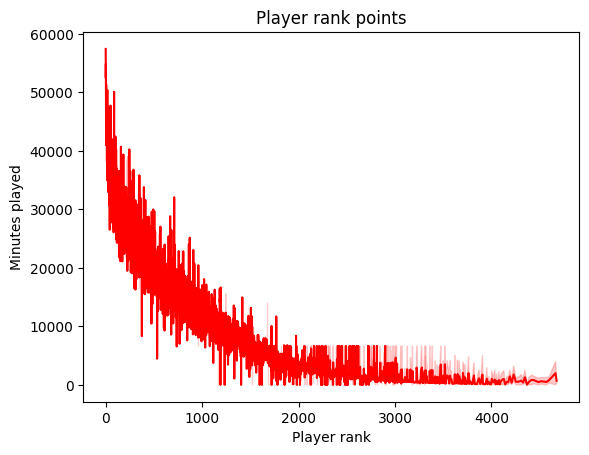

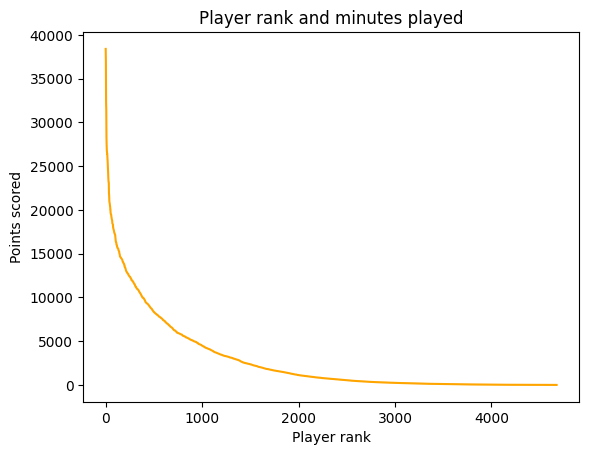

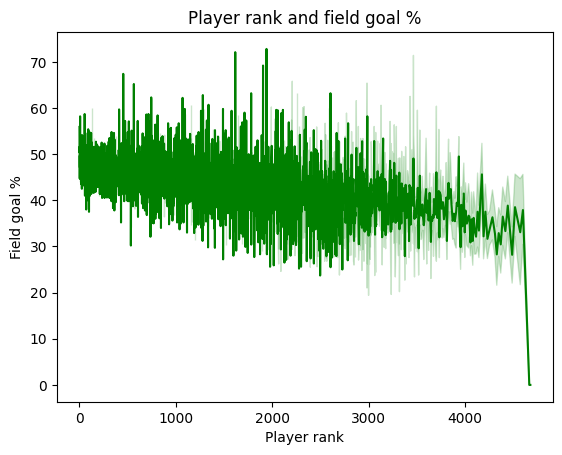

In [3]:
sns.lineplot(x='#', y='MIN', data=df, color='red')

plt.title('Player rank points')

plt.xlabel('Player rank')
plt.ylabel('Minutes played')

plt.show()
# --------------------------------------------
sns.lineplot(x='#', y='PTS', data=df, color='orange')

plt.title('Player rank and minutes played')

plt.xlabel('Player rank')
plt.ylabel('Points scored')

plt.show()

# --------------------------------------------

sns.lineplot(x='#', y='FG%', data=df, color='green')

plt.title('Player rank and field goal %')

plt.xlabel('Player rank')
plt.ylabel('Field goal %')

plt.show()

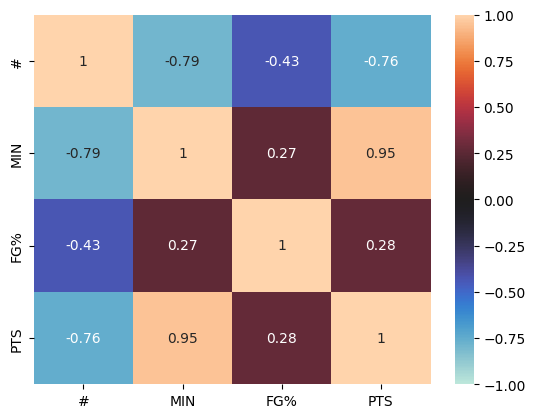

In [4]:
#correlation
sns.heatmap(df1, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

Comme montré dans le tableau ci dessus; les meilleurs joueurs n'ont pas forcement un bon pourcentage de tir. Mais ce sont ceux qui marquent le plus de points. Cela peut s'expliquer par le fait que les meilleurs joueurs ont plus de tirs qu'un joueur moyen (il joue plus longtemps donc on plus l'occasion de tirer). C'est pourquoi il est important de regarder le nombre de tirs effectués par un joueur pour avoir une idée de son efficacité.